In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [3]:
boston;

In [4]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

distance = boston_df['DIS'].values.reshape(506, 1)
prop = boston_df['B'].values.reshape(-1, 1)

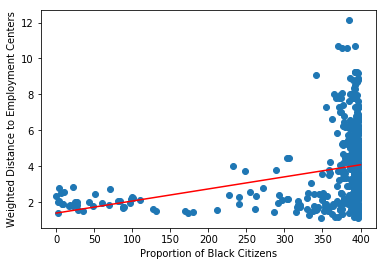

In [23]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(prop, distance)
prop_new = np.linspace(0, 400, 506).reshape(-1, 1)
dist_new = lin_reg.predict(prop_new)

plt.plot(prop, distance, 'o');
plt.plot(prop_new, dist_new, 'r-');
plt.xlabel('Proportion of Black Citizens');
plt.ylabel('Weighted Distance to Employment Centers');

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(prop, prop_new)
r2
r1 = 3
r1

-5.3087389650367784

3

#### This negative value indicates this a poor choice of a model for this data set.

In [7]:
pearson = boston_df[['DIS', 'B']].corr()
kendall = boston_df[['DIS', 'B']].corr('kendall')
spearman = boston_df[['DIS', 'B']].corr('spearman')

print(
f'''
Classic Pearson:
{pearson}
Kendall:
{kendall}
Spearman:
{spearman}
''')


Classic Pearson:
          DIS         B
DIS  1.000000  0.291512
B    0.291512  1.000000
Kendall:
          DIS         B
DIS  1.000000  0.168631
B    0.168631  1.000000
Spearman:
          DIS         B
DIS  1.000000  0.249595
B    0.249595  1.000000



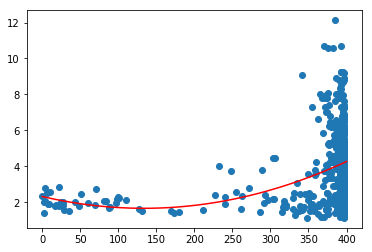

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("sgd_reg", LinearRegression()),
))

prop_poly_new = np.linspace(0, 400, 506).reshape(-1, 1);
polynomial_regression.fit(prop, distance);
predicted = polynomial_regression.predict(prop_poly_new);
plt.plot(prop, distance, 'o');
plt.plot(prop_poly_new, predicted, 'r-');
plt.xlabel('Proportion of Black Citizens');
plt.ylabel('Weighted Distance to Employment Centers');